Priprava podatko in povezovanje med CSV-ji po letih. Nato filtriranje vseh ne stanovanjskih objektov, ter vseh poslov, ki so se zgodili izven Ljubljane.

In [8]:
import pandas as pd
import numpy as np


print("Podatki o stavbi: ID Posla(0), Šifra KO(1), Ime KO(2), Občina(3), Številka stavbe(4), Številka dela stavbe(5), Parcelna številka za geolokacijo(6), Interna oznaka dela stavbe(7), Evidentiranost dela stavbe(8), Naselje(9), Ulica(10), Hišna številka(11), Dodatek HŠ(12), Številka stanovanja ali poslovnega prostora(13), Vrsta dela stavbe(14), Leto izgradnje dela stavbe(15), Stavba je dokončana(16), Gradbena faza(17), Novogradnja(18), Prodana površina(19), Prodani delež dela stavbe(20), Prodana površina dela stavbe(21), Prodana uporabna površina dela stavbe(22), Nadstropje dela stavbe(23), Število zunanjih parkirnih mest(24), Atrij(25), Površina atrija(26), Opombe o nepremičnini(27), Dejanska raba dela stavbe(28), Lega dela stavbe v stavbi(29), Število sob(30), Površina dela stavbe(31), Uporabna površina(32), Prostori dela stavbe(33), Pogodbena cena dela stavbe(34), Stopnja DDV dela stavbe(35)")
print("-----------------")
print("Podatki o transakciji: ID Posla(0), Vrsta kupoprodajnega posla(1), Datum uveljavitve(2), Datum sklenitve pogodbe(3), Pogodbena cena / Odškodnina(4), Vključenost DDV(5), Stopnja DDV(6), Datum izteka lizinga(7), Datum prenehanja lizinga(8), Opombe o pravnem poslu(9), Posredovanje nepremičninske agencije(10), Datum zadnje spremembe posla(11), Datum zadnje uveljavitve posla(12), Vrsta akta(13), Tržnost posla(14)")

stavbe2014 = "podatki/ETN_SLO_KUP_2014_20240302/ETN_SLO_KUP_2014_delistavb_20240302.csv"
posli2014 = "podatki/ETN_SLO_KUP_2014_20240302/ETN_SLO_KUP_2014_posli_20240302.csv"



def pridobiProdaje(stavbe, posli):
    podatki2014 = list()
    import csv

    with open(stavbe, 'r') as csv_file:
        reader = csv.reader(csv_file, delimiter=';')
        for row in reader:
            if(row[3] == 'LJUBLJANA' and ('Stanovanje' in row[28] or 'stanovanje' in row[28])):
                podatki2014.append(row)

    final2014 = list()
    posli2014List = list()
    with open(posli, 'r') as csv_file:
        reader = csv.reader(csv_file, delimiter=';')
        for row in reader:
            posli2014List.append(row)

    seenList = list()
    for posel in posli2014List:          
        for stan in podatki2014:
            #posel[1] -> 1, ker to so vse prodane nepremičnine na prostem trgu
            if(stan[0] == posel[0] and posel[1] == '1'):
                if(posel[0] not in seenList):
                    if(posel[4] == '' or stan[19] == '0' or float(stan[19].replace(',', '.')) < 10):
                        continue
                    seenList.append(posel[0])
                    final2014.append((posel[0], stan[10],  stan[11],  stan[15],  float(stan[19].replace(',', '.')), posel[3], float(posel[4].replace(',', '.'))))

    final = np.array(final2014 ,dtype="object")
    return final

final2014 = pridobiProdaje(stavbe2014, posli2014)

print("-----------------")
print("#ID, #Ime ulice, #Hišna številka, #Leto izgradnje stanovanja, #Kvadratura stanovanja, #Datum prodaje, #Cena (EUR)")
print(final2014[5])

Podatki o stavbi: ID Posla(0), Šifra KO(1), Ime KO(2), Občina(3), Številka stavbe(4), Številka dela stavbe(5), Parcelna številka za geolokacijo(6), Interna oznaka dela stavbe(7), Evidentiranost dela stavbe(8), Naselje(9), Ulica(10), Hišna številka(11), Dodatek HŠ(12), Številka stanovanja ali poslovnega prostora(13), Vrsta dela stavbe(14), Leto izgradnje dela stavbe(15), Stavba je dokončana(16), Gradbena faza(17), Novogradnja(18), Prodana površina(19), Prodani delež dela stavbe(20), Prodana površina dela stavbe(21), Prodana uporabna površina dela stavbe(22), Nadstropje dela stavbe(23), Število zunanjih parkirnih mest(24), Atrij(25), Površina atrija(26), Opombe o nepremičnini(27), Dejanska raba dela stavbe(28), Lega dela stavbe v stavbi(29), Število sob(30), Površina dela stavbe(31), Uporabna površina(32), Prostori dela stavbe(33), Pogodbena cena dela stavbe(34), Stopnja DDV dela stavbe(35)
-----------------
Podatki o transakciji: ID Posla(0), Vrsta kupoprodajnega posla(1), Datum uveljav

Vsi podatki iz obdobja **2013-2014** so urejeni. Sedaj je treba še urediti vse podatke do 02.03.2024 .

In [9]:
stavbe2015 = "podatki/ETN_SLO_KUP_2015_20240302/ETN_SLO_KUP_2015_delistavb_20240302.csv"
posli2015 = "podatki/ETN_SLO_KUP_2015_20240302/ETN_SLO_KUP_2015_posli_20240302.csv"
final2015 = pridobiProdaje(stavbe2015, posli2015)

stavbe2016 = "podatki/ETN_SLO_KUP_2016_20240302/ETN_SLO_KUP_2016_delistavb_20240302.csv"
posli2016 = "podatki/ETN_SLO_KUP_2016_20240302/ETN_SLO_KUP_2016_posli_20240302.csv"
final2016 = pridobiProdaje(stavbe2016, posli2016)

stavbe2017 = "podatki/ETN_SLO_KUP_2017_20240302/ETN_SLO_KUP_2017_delistavb_20240302.csv"
posli2017 = "podatki/ETN_SLO_KUP_2017_20240302/ETN_SLO_KUP_2017_posli_20240302.csv"
final2017 = pridobiProdaje(stavbe2017, posli2017)

stavbe2018 = "podatki/ETN_SLO_KUP_2018_20240302/ETN_SLO_KUP_2018_delistavb_20240302.csv"
posli2018 = "podatki/ETN_SLO_KUP_2018_20240302/ETN_SLO_KUP_2018_posli_20240302.csv"
final2018 = pridobiProdaje(stavbe2018, posli2018)

stavbe2019 = "podatki/ETN_SLO_KUP_2019_20240302/ETN_SLO_KUP_2019_delistavb_20240302.csv"
posli2019 = "podatki/ETN_SLO_KUP_2019_20240302/ETN_SLO_KUP_2019_posli_20240302.csv"
final2019 = pridobiProdaje(stavbe2019, posli2019)

stavbe2020 = "podatki/ETN_SLO_KUP_2020_20240302/ETN_SLO_KUP_2020_delistavb_20240302.csv"
posli2020 = "podatki/ETN_SLO_KUP_2020_20240302/ETN_SLO_KUP_2020_posli_20240302.csv"
final2020 = pridobiProdaje(stavbe2020, posli2020)

stavbe2021 = "podatki/ETN_SLO_KUP_2021_20240302/ETN_SLO_KUP_2021_delistavb_20240302.csv"
posli2021 = "podatki/ETN_SLO_KUP_2021_20240302/ETN_SLO_KUP_2021_posli_20240302.csv"
final2021 = pridobiProdaje(stavbe2021, posli2021)

stavbe2022 = "podatki/ETN_SLO_KUP_2022_20240302/ETN_SLO_KUP_2022_delistavb_20240302.csv"
posli2022 = "podatki/ETN_SLO_KUP_2022_20240302/ETN_SLO_KUP_2022_posli_20240302.csv"
final2022 = pridobiProdaje(stavbe2022, posli2022)

stavbe2023 = "podatki/ETN_SLO_KUP_2023_20240302/ETN_SLO_KUP_2023_delistavb_20240302.csv"
posli2023 = "podatki/ETN_SLO_KUP_2023_20240302/ETN_SLO_KUP_2023_posli_20240302.csv"
final2023 = pridobiProdaje(stavbe2023, posli2023)

stavbe2024 = "podatki/ETN_SLO_KUP_2024_20240302/ETN_SLO_KUP_2024_delistavb_20240302.csv"
posli2024 = "podatki/ETN_SLO_KUP_2024_20240302/ETN_SLO_KUP_2024_posli_20240302.csv"
final2024 = pridobiProdaje(stavbe2024, posli2024)





In [3]:
np.set_printoptions(threshold=1504000)
# print(final2015)

**Vizualizacije**

In [4]:
import matplotlib.pyplot as plt 

In [5]:
# KODA
# Število prodaj na leto (rolling average)
# ID, #Ime ulice, #Hišna številka, #Leto izgradnje stanovanja, #Kvadratura stanovanja, #Datum prodaje, #Cena (EUR)

podatki_za_leto = [final2014,final2015,final2016,final2017,final2018,final2019,final2020,final2021,final2022,final2023]
stevilo_prodaj_po_letih = []
leto = 2014

for leto_analize in podatki_za_leto:
    stevilo_prodaj_po_letih.append([leto,len(leto_analize)])
    leto += 1;

stevilo_prodaj_po_letih = np.array(stevilo_prodaj_po_letih)
stevilo_prodaj_po_letih


array([[2014, 3126],
       [2015, 3054],
       [2016, 3120],
       [2017, 3262],
       [2018, 2675],
       [2019, 3103],
       [2020, 2844],
       [2021, 2938],
       [2022, 2626],
       [2023, 2328]])

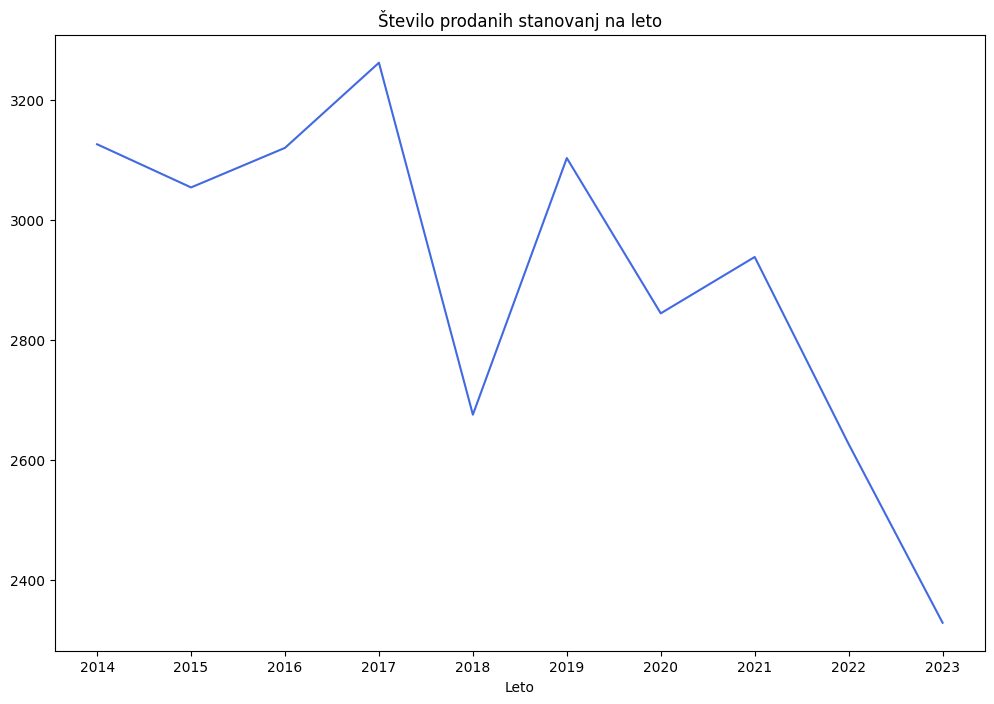

In [6]:
plt.figure(figsize=(12,8))
plt.title("Število prodanih stanovanj na leto") 
plt.xlabel("Leto") 
plt.plot(stevilo_prodaj_po_letih[:, 0], stevilo_prodaj_po_letih[:, 1], color ="royalblue") 
plt.xticks(stevilo_prodaj_po_letih[:, 0])
plt.show()

[3730000, 3100000, 1700000, 3000000, 3160000, 2948000, 5758600, 1619760, 5500000, 7500000]


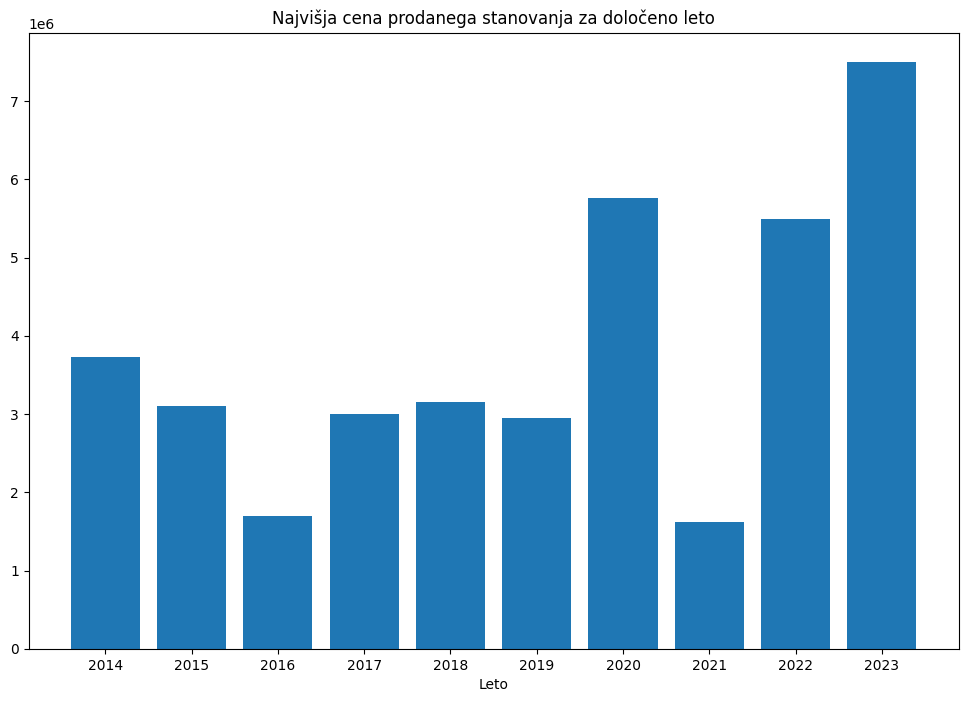

In [7]:
# MAX prodajna cena za vsako leto
x_os = stevilo_prodaj_po_letih[:, 0]

max_cena_za_vsako_leto = []

for leto_analize in podatki_za_leto:
    max_cena_za_vsako_leto.append(np.max(leto_analize[:, 6].astype(int)))

print(max_cena_za_vsako_leto)

plt.figure(figsize=(12,8))
plt.bar(x_os, max_cena_za_vsako_leto)
plt.title("Najvišja cena prodanega stanovanja za določeno leto")
plt.xlabel("Leto")
plt.xticks(x_os)
plt.show()


In [8]:
# Line graph za število prodanih stanovanj za vsak mesec v letu za posamezna leta

# Za vsako leto shranimo število prodanih stanovanj na mesec
mesec_stanovanja_leta = [["2014"], ["2015"], ["2016"],["2017"], ["2018"], ["2019"],["2020"], ["2021"], ["2022"], ["2023"]]
meseci = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

stevec = 0

for leto_analize in podatki_za_leto:
    meseci_slovar = dict()

    # Init: mesec -> seznam z vrsticami za ta mesec
    for i in meseci:
        meseci_slovar[i] = 0
    
    # Število prodanih stanovanj v določenem mesecu
    for row in leto_analize:
        mesec = row[5].split(".")[1]
        meseci_slovar[mesec] += 1

    temp_arr = []

    for stevilo_prodanih_na_mesec in meseci_slovar.values():
        temp_arr.append(stevilo_prodanih_na_mesec)

    temp_arr = np.array(temp_arr)
    mesec_stanovanja_leta[stevec].append(temp_arr)
    stevec += 1


mesec_stanovanja_leta = np.array(mesec_stanovanja_leta, dtype="object")
        
mesec_stanovanja_leta

array([['2014',
        array([191, 191, 236, 256, 230, 274, 296, 223, 335, 296, 349, 249])],
       ['2015',
        array([179, 211, 233, 217, 246, 260, 258, 220, 274, 285, 343, 328])],
       ['2016',
        array([197, 239, 303, 258, 291, 269, 224, 231, 286, 313, 273, 236])],
       ['2017',
        array([281, 241, 319, 256, 296, 315, 292, 204, 230, 277, 282, 269])],
       ['2018',
        array([239, 213, 286, 225, 240, 227, 169, 187, 225, 212, 221, 231])],
       ['2019',
        array([241, 243, 262, 260, 281, 233, 231, 209, 265, 338, 237, 303])],
       ['2020',
        array([254, 242, 195,  87, 150, 260, 240, 201, 304, 279, 343, 289])],
       ['2021',
        array([194, 220, 294, 263, 279, 286, 254, 201, 225, 255, 252, 215])],
       ['2022',
        array([204, 214, 281, 244, 232, 190, 189, 182, 227, 199, 229, 235])],
       ['2023',
        array([182, 164, 256, 176, 218, 231, 154, 145, 165, 257, 216, 164])]],
      dtype=object)

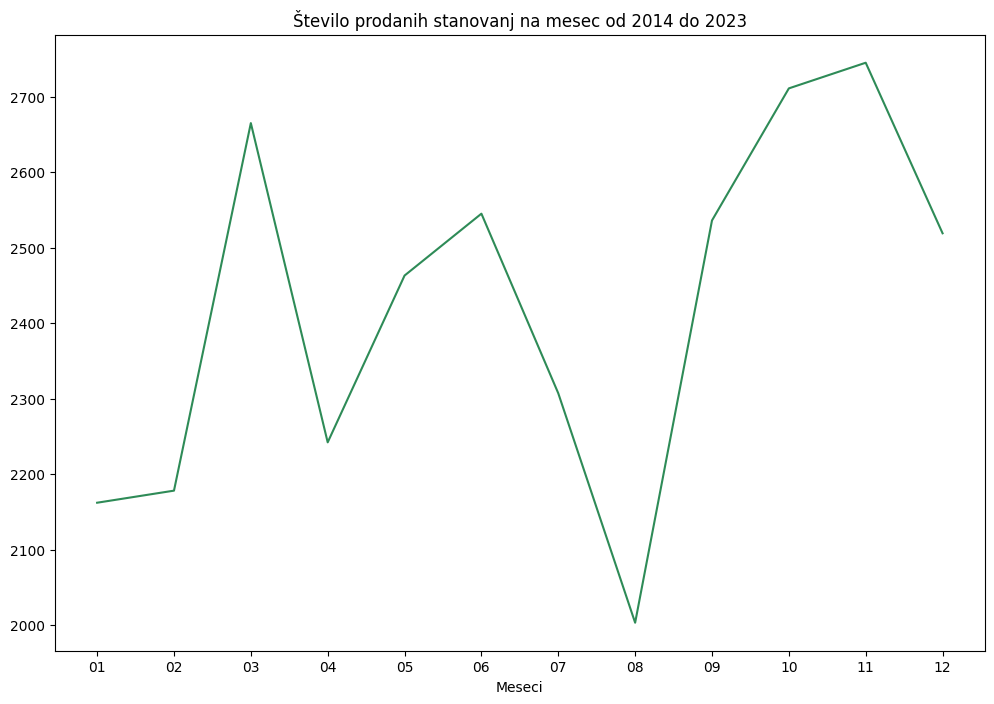

In [9]:
mesecno_stevilo_prodanih_vsa_leta = np.zeros(12)

for letni_podatki in mesec_stanovanja_leta:
    mesecne_vrednosti = letni_podatki[1]
    mesecno_stevilo_prodanih_vsa_leta += mesecne_vrednosti


mesecno_stevilo_prodanih_vsa_leta = mesecno_stevilo_prodanih_vsa_leta.astype(int)

plt.figure(figsize=(12,8))
plt.title("Število prodanih stanovanj na mesec od 2014 do 2023") 
plt.xlabel("Meseci") 
plt.plot(meseci, mesecno_stevilo_prodanih_vsa_leta, color ="seagreen") 
plt.show()

**Iskanje osamelcev**


S pomočjo histogramov bomo probali ugotoviti porazdelitev stanovanj ter iskali osamelce.

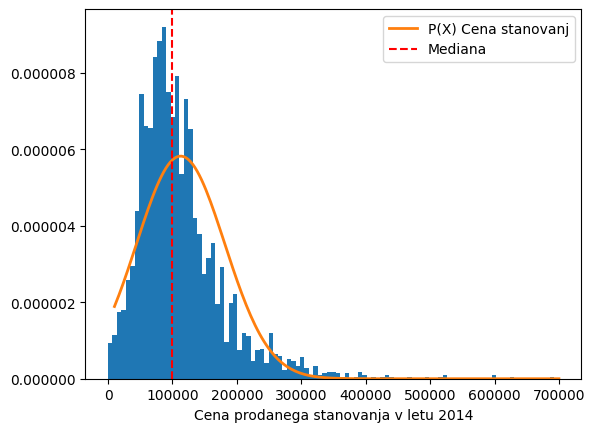

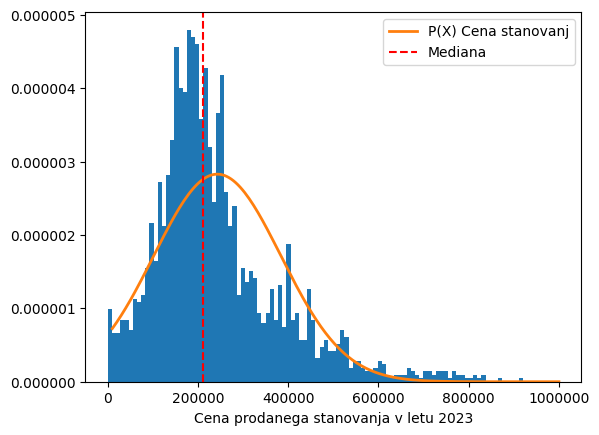

In [10]:
from scipy.stats import multivariate_normal as mvn


def hist(final_array, year):
    if(year < 2019):
        podMiljon = final_array[final_array[:,6] < 700000]
    else:
        podMiljon = final_array[final_array[:,6] < 1000000]
    median_price = np.median(podMiljon[:,6])

    mean = np.mean(podMiljon[:,6])
    n = len(podMiljon)
    sigma2 = (n-1)/n * np.var(podMiljon[:,6])
    if(year < 2019):
        x_os = np.linspace(10000, 700000, 200)
    else:
        x_os = np.linspace(10000, 1000000, 200)

    porazdelitvena = [mvn.pdf(x, mean, sigma2) for x in x_os]

    plt.figure()
    plt.hist(podMiljon[:,6], bins=100, density=True)
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.plot(x_os, porazdelitvena, label="P(X) Cena stanovanj", linewidth=2.0)
    plt.axvline(x=median_price, color='red', linestyle='--', label='Mediana')

    plt.xlabel("Cena prodanega stanovanja v letu " + str(year))
    plt.legend()
    plt.show()


hist(final2014, 2014)
hist(final2023, 2023)


***To Do (Potencialno)***
- Model, ki napove ceno stanovanja, glede na zadnji dve leti,
- Povprečna cena glede na tip stanovanja (garsonjera, 1-sobno,...)
- HeatMap cene stanovanj
- Cena stanovanja glede na kvadraturu (ali je premica linearna/logaritmična?)

## Analiza cene stanovanj skozi leta glede  na kvadraturo
V tej sekciji analize bomo raziskali trende prodajne cene stanovanj glede na njihovo kvadraturo. In sicer, bomo jih razvrstili na štiri kategorije.
<ul>
<li>Vsa stanovanja med 10 m^2 in 30 m^2 (≈ Garsonjere)</li>
<li>Stanovanja med 30 m^2 in 70 m^2 (≈ 1-sobna, 2-sobna)</li>
<li>Stanovanja med 70 m^2  in 100 m^2 (≈ 3-sobna, 4-sobna)</li>
<li>Stanovanja večja od 100 m^2</li>
</ul>

Začeli bomo s pregledom trenda cen garsonjer.

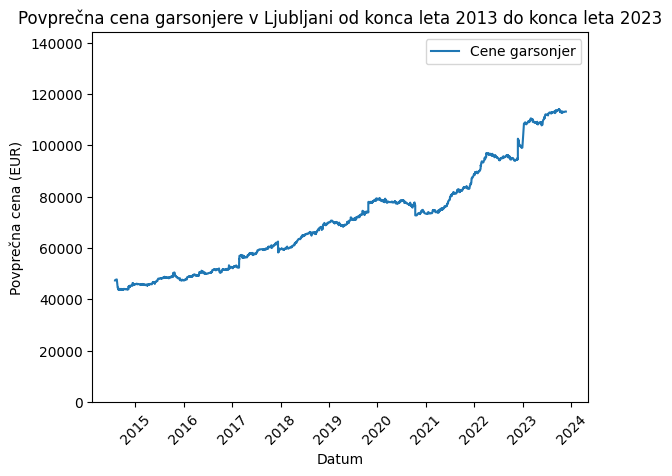

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

all_final = np.concatenate((final2014, final2015, final2016, final2017, final2018, final2019, final2020, final2021, final2022, final2023))
Garsonjere = all_final[(all_final[:, 4] >= 10) & (all_final[:, 4] <= 30)]

def convert_date(date_string):
    return datetime.strptime(date_string, "%d.%m.%Y")

Garsonjere = np.array(sorted(Garsonjere, key=lambda x: np.datetime64(convert_date(x[5]))))

counter = 0
sumaCena = 0
garsonjereList = []

for stanovanje in Garsonjere:
    if counter < 240:
        sumaCena += stanovanje[6]
        garsonjereList.append((convert_date(stanovanje[5]), stanovanje[6]))
        counter += 1
    else:
        sumaCena += stanovanje[6] - garsonjereList[counter - 240][1]
        garsonjereList.append((convert_date(stanovanje[5]), stanovanje[6], (sumaCena / 240)))
        counter += 1

garsonjereList = np.array(garsonjereList[240:], dtype="object")

fig, ax = plt.subplots()
ax.plot([x[0] for x in garsonjereList], [x[2] for x in garsonjereList], label="Cene garsonjer")
ax.legend(loc=0) 
ax.set_title('Povprečna cena garsonjere v Ljubljani od konca leta 2013 do konca leta 2023')
plt.xlabel('Datum')
plt.ylabel('Povprečna cena (EUR)')
plt.xticks(rotation=45)
max_y_value = np.max([x[2] for x in garsonjereList])
ax.set_ylim(0, max_y_value + 30000)
plt.show()
garsonjereListFinal = garsonjereList

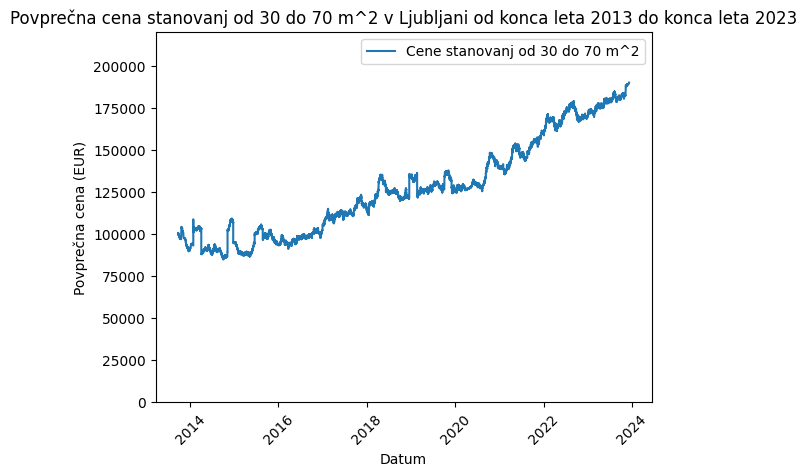

In [12]:
Garsonjere = all_final[(all_final[:, 4] > 30) & (all_final[:, 4] < 70)]

def convert_date(date_string):
    return datetime.strptime(date_string, "%d.%m.%Y")

Garsonjere = np.array(sorted(Garsonjere, key=lambda x: np.datetime64(convert_date(x[5]))))

counter = 0
sumaCena = 0
garsonjereList = []

for stanovanje in Garsonjere:
    if counter < 240:
        sumaCena += stanovanje[6]
        garsonjereList.append((convert_date(stanovanje[5]), stanovanje[6]))
        counter += 1
    else:
        sumaCena += stanovanje[6] - garsonjereList[counter - 240][1]
        garsonjereList.append((convert_date(stanovanje[5]), stanovanje[6], (sumaCena / 240)))
        counter += 1

garsonjereList = np.array(garsonjereList[240:], dtype="object")

fig, ax = plt.subplots()
ax.plot([x[0] for x in garsonjereList], [x[2] for x in garsonjereList], label="Cene stanovanj od 30 do 70 m^2")
ax.legend(loc=0) 
ax.set_title('Povprečna cena stanovanj od 30 do 70 m^2 v Ljubljani od konca leta 2013 do konca leta 2023')
plt.xlabel('Datum')
plt.ylabel('Povprečna cena (EUR)')
plt.xticks(rotation=45)
max_y_value = np.max([x[2] for x in garsonjereList])
ax.set_ylim(0, max_y_value + 30000)
plt.show()
finalList2 = garsonjereList

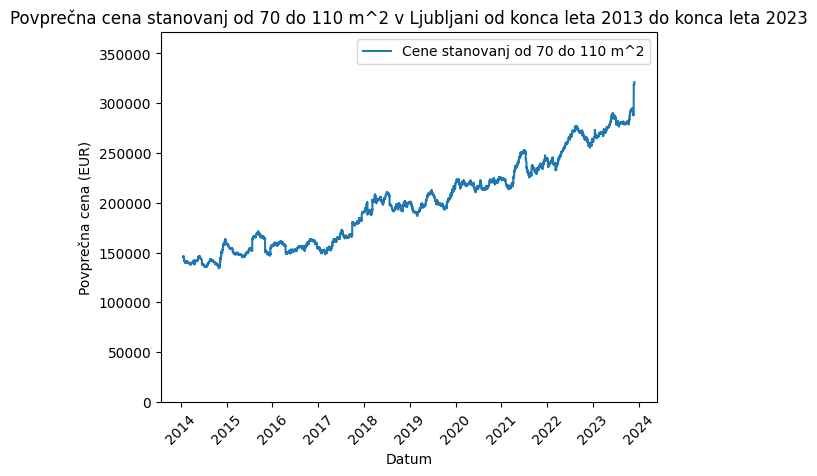

In [13]:
Garsonjere = all_final[(all_final[:, 4] > 70) & (all_final[:, 4] < 110)]

def convert_date(date_string):
    return datetime.strptime(date_string, "%d.%m.%Y")

Garsonjere = np.array(sorted(Garsonjere, key=lambda x: np.datetime64(convert_date(x[5]))))

counter = 0
sumaCena = 0
garsonjereList = []

for stanovanje in Garsonjere:
    if counter < 240:
        sumaCena += stanovanje[6]
        garsonjereList.append((convert_date(stanovanje[5]), stanovanje[6]))
        counter += 1
    else:
        sumaCena += stanovanje[6] - garsonjereList[counter - 240][1]
        garsonjereList.append((convert_date(stanovanje[5]), stanovanje[6], (sumaCena / 240)))
        counter += 1

garsonjereList = np.array(garsonjereList[240:], dtype="object")

fig, ax = plt.subplots()
ax.plot([x[0] for x in garsonjereList], [x[2] for x in garsonjereList], label="Cene stanovanj od 70 do 110 m^2")
ax.legend(loc=0) 
ax.set_title('Povprečna cena stanovanj od 70 do 110 m^2 v Ljubljani od konca leta 2013 do konca leta 2023')
plt.xlabel('Datum')
plt.ylabel('Povprečna cena (EUR)')
plt.xticks(rotation=45)
max_y_value = np.max([x[2] for x in garsonjereList])
ax.set_ylim(0, max_y_value + 50000)
plt.show()
finalList3 = garsonjereList

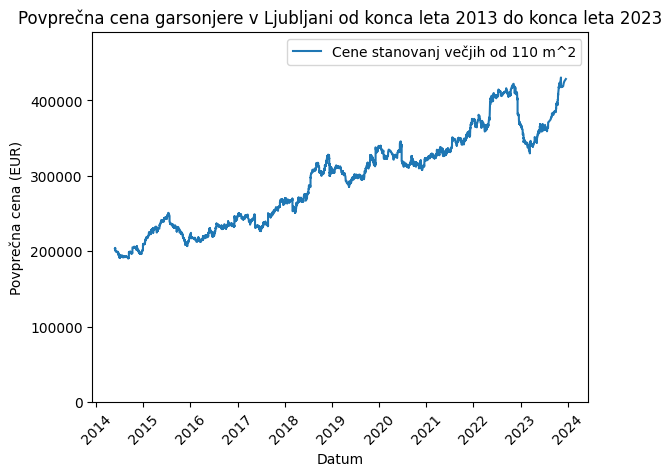

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

all_final = np.concatenate((final2014, final2015, final2016, final2017, final2018, final2019, final2020, final2021, final2022, final2023))
Garsonjere = all_final[all_final[:,4] > 110]

def convert_date(date_string):
    return datetime.strptime(date_string, "%d.%m.%Y")

Garsonjere = np.array(sorted(Garsonjere, key=lambda x: np.datetime64(convert_date(x[5]))))

counter = 0
sumaCena = 0
garsonjereList = []

for stanovanje in Garsonjere:
    if counter < 240:
        sumaCena += stanovanje[6]
        garsonjereList.append((convert_date(stanovanje[5]), stanovanje[6]))
        counter += 1
    else:
        sumaCena += stanovanje[6] - garsonjereList[counter - 240][1]
        garsonjereList.append((convert_date(stanovanje[5]), stanovanje[6], (sumaCena / 240)))
        counter += 1

garsonjereList = np.array(garsonjereList[240:], dtype="object")

fig, ax = plt.subplots()
ax.plot([x[0] for x in garsonjereList], [x[2] for x in garsonjereList], label="Cene stanovanj večjih od 110 m^2")
ax.legend(loc=0) 
ax.set_title('Povprečna cena garsonjere v Ljubljani od konca leta 2013 do konca leta 2023')
plt.xlabel('Datum')
plt.ylabel('Povprečna cena (EUR)')
plt.xticks(rotation=45)
max_y_value = np.max([x[2] for x in garsonjereList])
ax.set_ylim(0, max_y_value + 60000)
plt.show()
finalList4 = garsonjereList


In [15]:
print( np.average(garsonjereListFinal[len(garsonjereListFinal)-10:,2])/np.average(garsonjereListFinal[:10,2]))
print( np.average(finalList2[len(finalList2)-10:,2])/np.average(finalList2[:10,2]))
print( np.average(finalList3[len(finalList3)-10:,2])/np.average(finalList3[:10,2]))
print( np.average(finalList4[len(finalList4)-10:,2])/np.average(finalList4[:10,2]))



2.4636500428809387
1.8860834476905053
2.1331914508863186
2.071114861358324


| Tip stanovanja                 | Odstotek rasti tipa stanovanj |
|-------------------------------|-------------------------------|
| Garsonjera med 10 in 30 m^2    | 246%                          |
| Stanovanje med 30 in 70 m^2   | 188%                          |
| Stanovanje med 70 in 110 m^2  | 213%                          |
| Stanovanje več kot 110 m^2    | 207%                          |


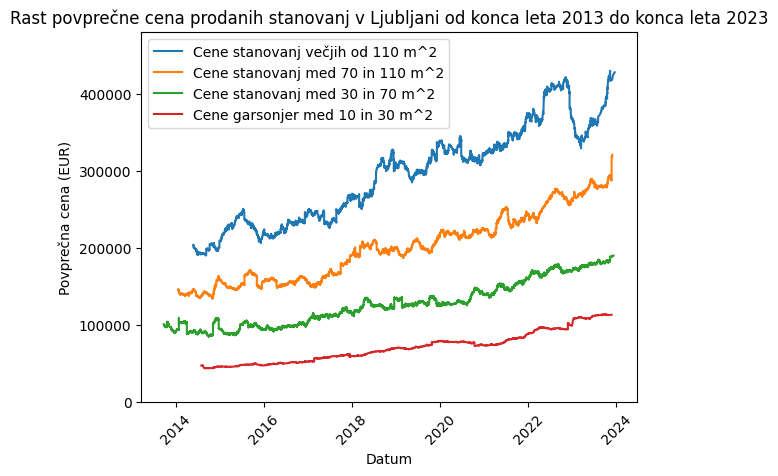

In [16]:
fig, ax = plt.subplots()
ax.plot([x[0] for x in finalList4], [x[2] for x in finalList4], label="Cene stanovanj večjih od 110 m^2")
ax.plot([x[0] for x in finalList3], [x[2] for x in finalList3], label="Cene stanovanj med 70 in 110 m^2")
ax.plot([x[0] for x in finalList2], [x[2] for x in finalList2], label="Cene stanovanj med 30 in 70 m^2")
ax.plot([x[0] for x in garsonjereListFinal], [x[2] for x in garsonjereListFinal], label="Cene garsonjer med 10 in 30 m^2")
ax.legend(loc=0) 
ax.set_title('Rast povprečne cena prodanih stanovanj v Ljubljani od konca leta 2013 do konca leta 2023')
plt.xlabel('Datum')
plt.ylabel('Povprečna cena (EUR)')
plt.xticks(rotation=45)
max_y_value = np.max([x[2] for x in finalList4])
ax.set_ylim(0, max_y_value + 50000)
plt.show()

UGOTOVITVE!!!! (Add Text)

## Analiza cene stanovanj glede na kvadraturo
V tem delu poročila bomo poskušali ugotoviti kako izgleda cena stanovanj glede na kvadraturo - Ali so manjša stanovanja dražja kot večja ali ne. Pogledali bomo ali so se te cene spremenile skozi leta.

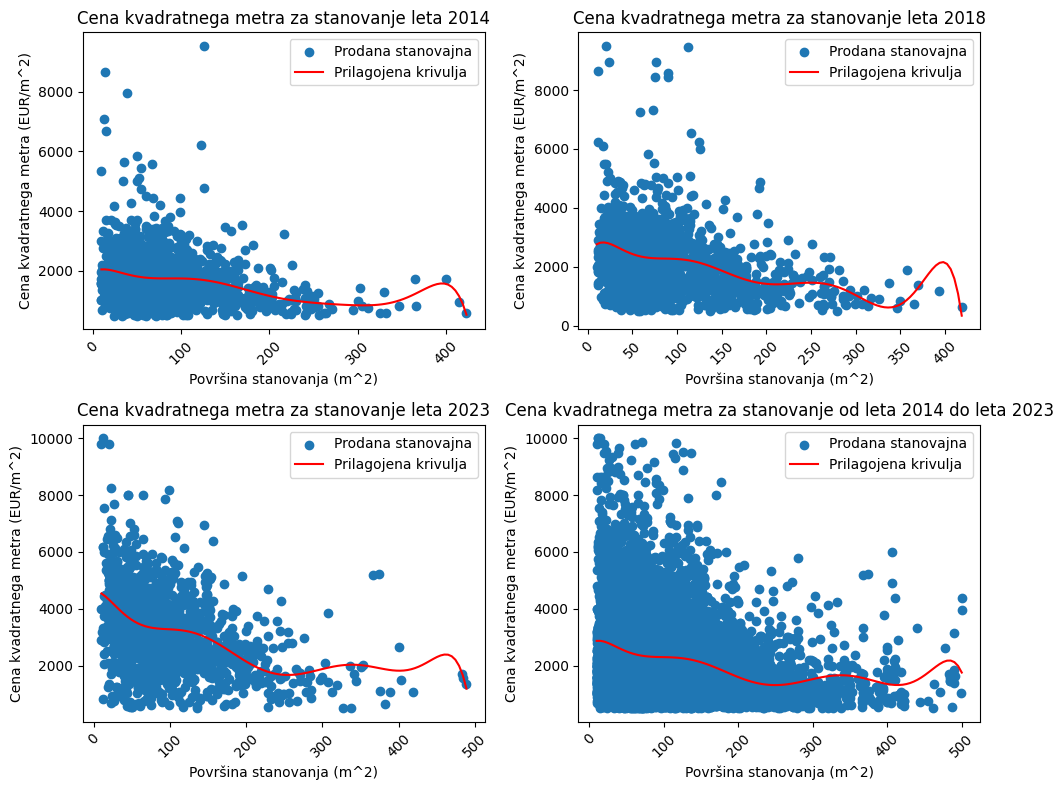

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(ax, final_array):
    notsorted = [(int(round(x[4],0)),int(round(float(x[6])/float(x[4]),0))) for x in final_array]
    notsorted = sorted(notsorted, key=lambda x: x[0])
    notsorted = [x for x in notsorted if not (x[0] < 10 or x[1] > 10000 or x[1] < 500 or x[0] > 500)]

    x = [x[0] for x in notsorted]
    y = [y[1] for y in notsorted]

    fit = np.polyfit(x, y, 8)
    fit_x = np.linspace(min(x), max(x), 100)
    fit_y = np.polyval(fit, fit_x)
    
    ax.scatter(x, y, label="Prodana stanovajna")
    ax.plot(fit_x, fit_y, color='red', label="Prilagojena krivulja")

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

plot_data(axs[0, 0], final2014)
plot_data(axs[0, 1], final2018)
plot_data(axs[1, 0], final2023)
plot_data(axs[1, 1], all_final)

sez = [" leta 2014", " leta 2018", " leta 2023", " od leta 2014 do leta 2023"]
for i,ax in enumerate(axs.flat):
    ax.set_xlabel('Površina stanovanja (m^2)')
    ax.set_ylabel('Cena kvadratnega metra (EUR/m^2)')
    ax.set_title('Cena kvadratnega metra za stanovanje'  + sez[i])
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


**Ugotovitve**
<br> 
Opazimo lahko, da je cena stanovanja glede na na kvadratni meter, manjša, če je stanovanje večje. Pri vseh letih pa lahko opazimo, da se stanovanja ponovno podražijo, če je stanovanje večje od ≈ 300m^2. Lahko tudi opazimo, da je v zadnjem letu v primerjavi z ostalima letoma krivulja dosti bolj strma.

## Heat Map cen stanovanj v Ljubljani

In [116]:
# ID, #Ime ulice, #Hišna številka, ..., #Cena[EUR]
data2014 = final2014[:100]
data2018 = final2018[:100]
data2023 = final2023[:50]

formatted_data2023 = [
    f"{item[1]} {item[2]}, 1000 Ljubljana, Slovenia" for item in data2023
]

formatted_data2018 = [
    f"{item[1]} {item[2]}, 1000 Ljubljana, Slovenia" for item in data2018
]

formatted_data2014 = [
    f"{item[1]} {item[2]}, 1000 Ljubljana, Slovenia" for item in data2014
]

In [21]:
import os
import requests
import pandas as pd
import json

import folium
from folium.plugins import HeatMap

API_KEY = os.environ.get("GEOAPIFY_API_KEY")
url = f"https://api.geoapify.com/v1/batch/geocode/search?apiKey={API_KEY}";
headers = {"Content-Type": "application/json"}
data = formatted_data2023

try:
    resp = requests.post(url, headers=headers, data=json.dumps(data))
    print(resp.json())
except requests.exceptions.HTTPError as e:
    print(e.response.text)


# resp = requests.get(url=url, params=params)
# data = resp.json()

# print(data)



{'id': '683551d0d5574089ae4a56a62930ee00', 'status': 'pending', 'url': 'https://api.geoapify.com/v1/batch/geocode/search?id=683551d0d5574089ae4a56a62930ee00&apiKey=da95bcfbe2d24fb7aa4076f15d42e416'}


In [91]:
# Batch id for first 50 addresses in data2023
job_id_data2023 = "683551d0d5574089ae4a56a62930ee00"

url = f"https://api.geoapify.com/v1/batch?id={job_id_data2023}&apiKey={API_KEY}"

response = requests.get(url)

response_data2023 = response.json()

{'api': '/v1/geocode/search', 'params': {}, 'limit': 1, 'id': '683551d0d5574089ae4a56a62930ee00', 'results': [{'params': {'text': 'REBOLJEVA ULICA 12, 1000 Ljubljana, Slovenia'}, 'result': {'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'datasource': {'sourcename': 'openstreetmap', 'attribution': '© OpenStreetMap contributors', 'license': 'Open Database License', 'url': 'https://www.openstreetmap.org/copyright'}, 'country': 'Slovenia', 'country_code': 'si', 'city': 'Ljubljana', 'municipality': 'Upravna Enota Ljubljana', 'postcode': '1000', 'district': 'BS3', 'suburb': 'Četrtna skupnost Bežigrad', 'street': 'Reboljeva ulica', 'housenumber': '12', 'lon': 14.517639, 'lat': 46.08264, 'result_type': 'building', 'formatted': 'Reboljeva ulica 12, 1000 Ljubljana, Slovenia', 'address_line1': 'Reboljeva ulica 12', 'address_line2': '1000 Ljubljana, Slovenia', 'timezone': {'name': 'Europe/Ljubljana', 'name_alt': 'Europe/Belgrade', 'offset_STD': '+01:00', 'offset_STD_s

In [106]:
job_id_data2018 = "683551d0d5574089ae4a56a62930ee00"

url = f"https://api.geoapify.com/v1/batch?id={job_id_data2023}&apiKey={API_KEY}"

response = requests.get(url)

print(response.json())

NameError: name 'job_id_data2023' is not defined

In [86]:
# with open("geocoding_data2018.json", "w") as outfile:
#     json.dump(response.json(), outfile)

In [120]:
# Ustvari seznam seznamov [[lat, long, cena stanovanja]]
# 2023

parsed_data2023 = []
geocoding_data2023 = response.json()
formatted_price_data2023 = [[f"{item[1]} {item[2]}", item[-1]] for item in data2023]

for result in geocoding_data2023["results"]:
    text = result["result"]["query"]["text"].split(",", 1)[0]
    lat = result["result"]["features"][0]["properties"]["lat"]
    lon = result["result"]["features"][0]["properties"]["lon"]
    
    for (street_name, price) in formatted_price_data2023:
        if (text == street_name):
            parsed_data2023.append([lat, lon, price])
            
    


parsed_data2023

[[46.08264, 14.517639, 60301.22],
 [46.05573245, 14.50941833501794, 4500.0],
 [46.074934, 14.487892, 243000.0],
 [46.04352, 14.509825, 40000.0],
 [46.0625601, 14.5169328, 99000.0],
 [46.0468732, 14.500925842683106, 615000.0],
 [46.0855452, 14.4770672, 75000.0],
 [46.071994, 14.4688, 415000.0],
 [46.0486229, 14.539532705695708, 98000.0],
 [46.0775198, 14.4864517, 260000.0],
 [46.0655361, 14.49814197999195, 180000.0],
 [46.068187, 14.472339, 410000.0],
 [46.0463201, 14.491384, 90000.0],
 [46.037805, 14.49901, 280682.93],
 [46.07863245, 14.509660786858502, 210000.0],
 [46.0311363, 14.519461840433124, 307000.0],
 [46.0753836, 14.4898005, 221000.0],
 [46.002276, 14.512126, 190000.0],
 [46.050879, 14.478978, 355000.0],
 [46.120868, 14.50265252712766, 316000.0],
 [46.015532, 14.543313, 7777.76],
 [46.0433267, 14.4812473, 260000.0],
 [46.05295185, 14.553134152178083, 180000.0],
 [46.03517, 14.562892, 220000.0],
 [46.0692631, 14.5050808, 140000.0],
 [46.06895795, 14.491198095031436, 282000.0],


In [122]:
ljubljana_map = folium.Map(location=[46.0569, 14.5058], zoom_start=13)

HeatMap(parsed_data2023, radius=15, blur=5).add_to(ljubljana_map)

ljubljana_map.save("condo_prices_heatmap_2023.html")